## Tải các thư viện cần thiết 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn 
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

##  Tổng quan về dữ liệu 

In [3]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")

In [4]:
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df = df.drop(columns=["DoctorInCharge"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Ta thấy dữ liệu gồm 2149 bản ghi, mỗi bản ghi gồm 35 hàng

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## Tiền xử lý dữ liệu 

In [8]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Không có dữ liệu nào bị thiếu

In [9]:
df.duplicated().sum()

0


Không có hai bản ghi nào trùng lặp

## Trực quan hóa dữ liệu 

In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(f"Số ngoại lệ :\n{outliers_count}")

Số ngoại lệ :
PatientID                      0
Age                            0
Gender                         0
Ethnicity                    211
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease        310
Diabetes                     324
Depression                   431
HeadInjury                   199
Hypertension                 320
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment           0
MemoryComplaints             447
BehavioralProblems           337
ADL                            0
Confusion                    441
Disorientation               

Biểu đồ cột cho thấy phân phối dữ liệu tổng quan của các trường: 


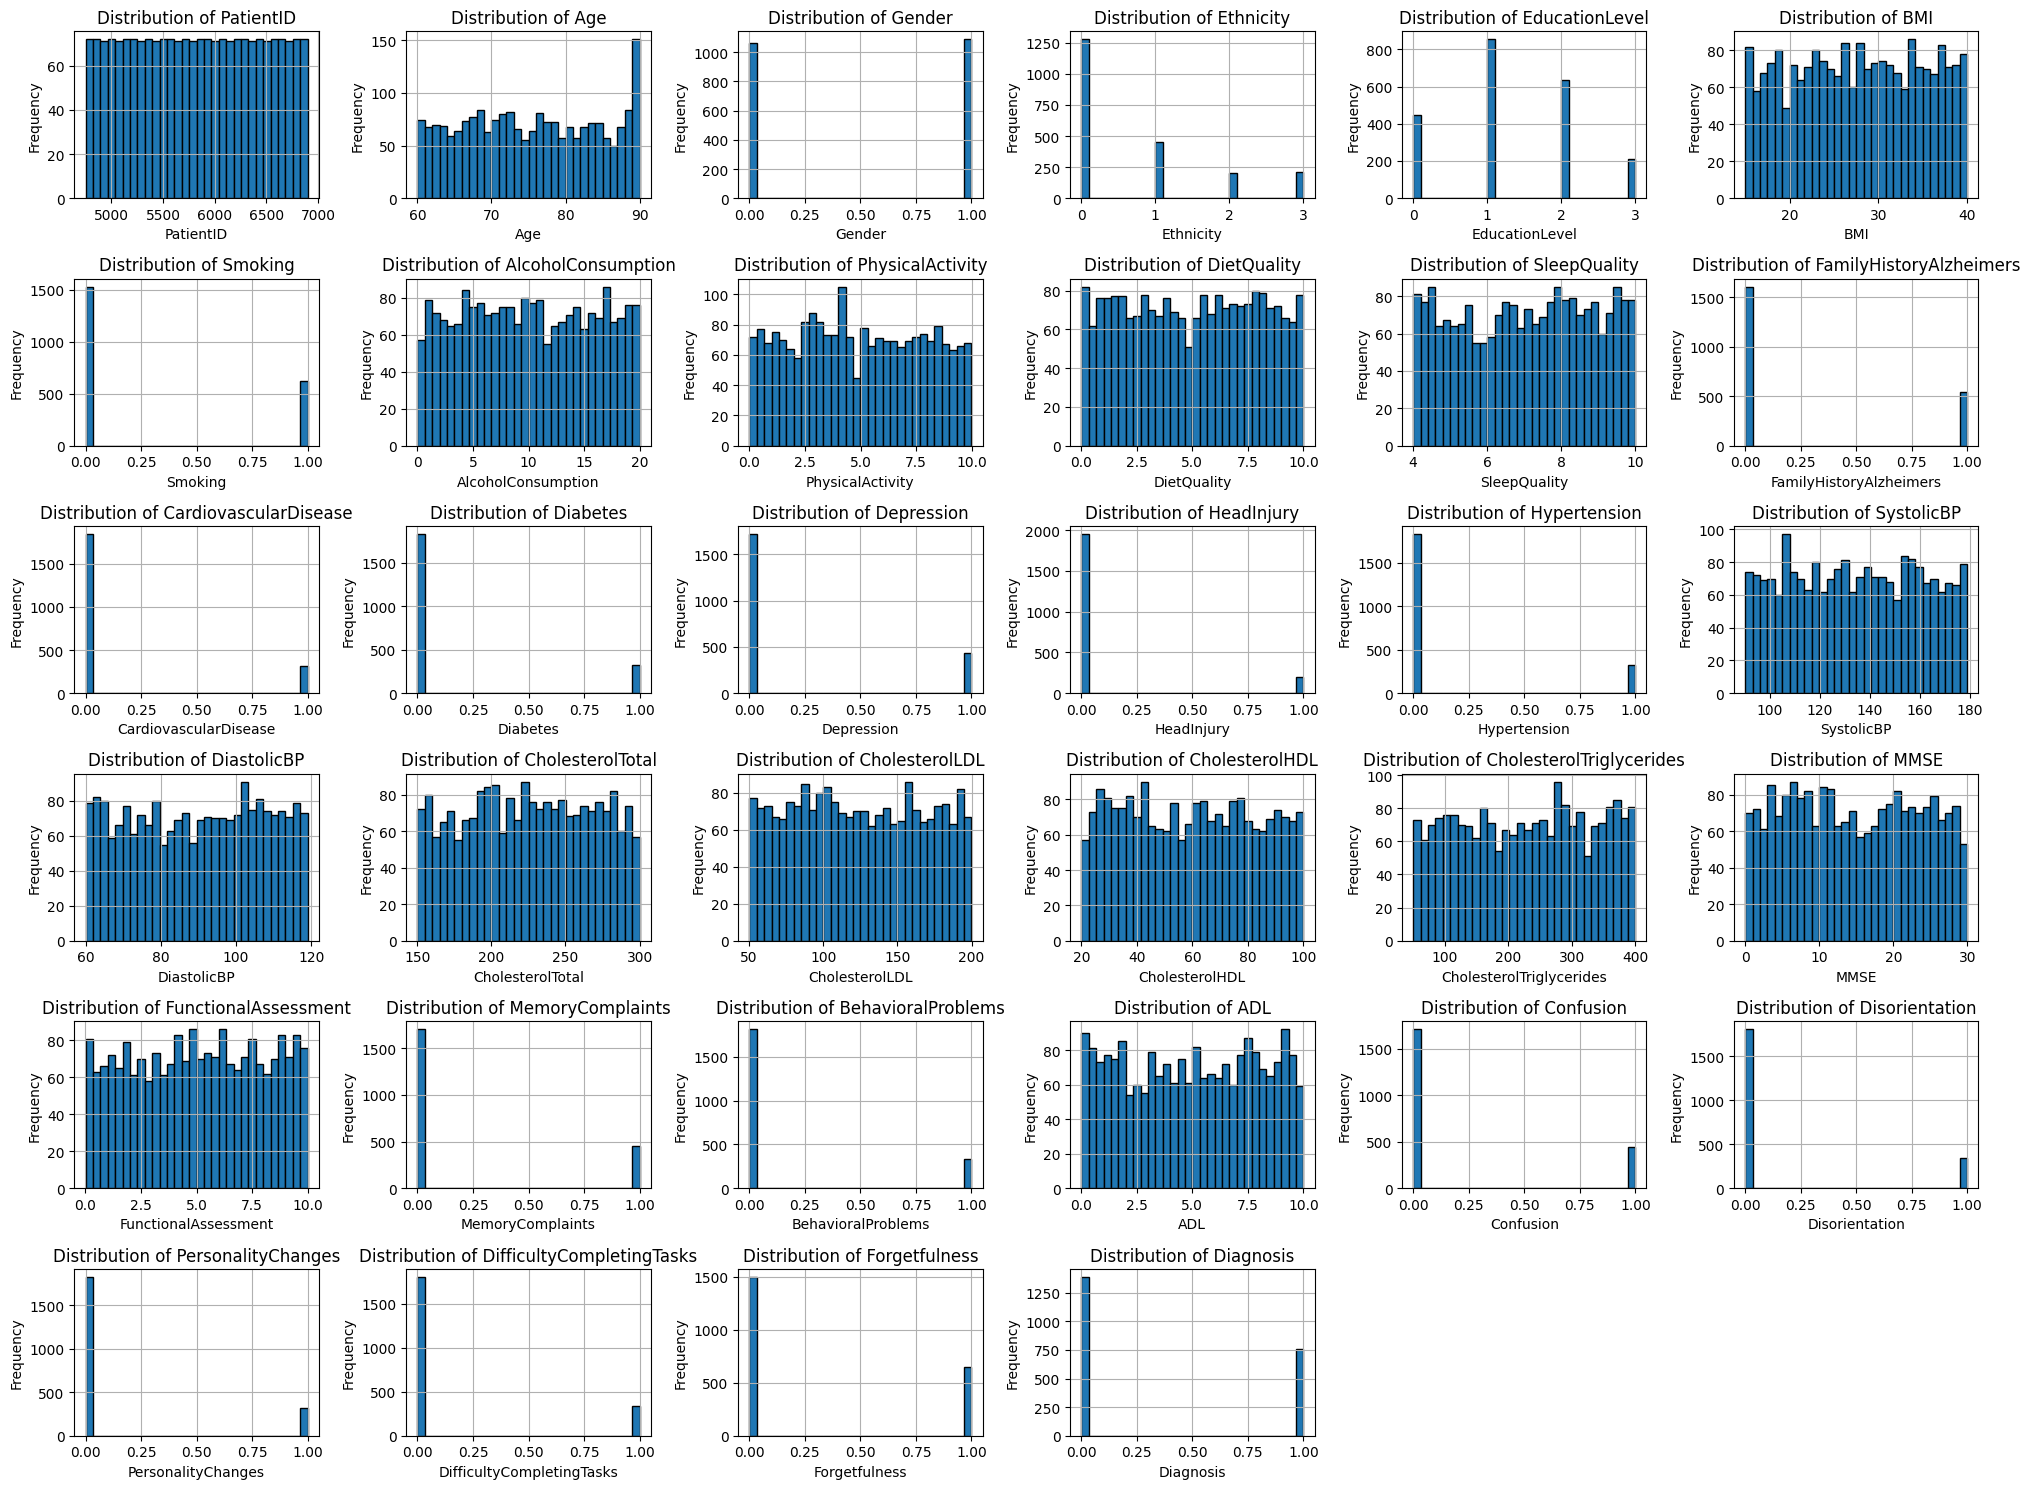

In [11]:
axes = df.hist(figsize=(20,15), bins=30, edgecolor='black')
for ax, col in zip(axes.flatten(), numeric_columns):
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
print("Biểu đồ cột cho thấy phân phối dữ liệu tổng quan của các trường: ")
plt.tight_layout()
plt.show()

Từ đây có thể thấy, tập dữ liệu này không quá cân bằng. Số dữ liệu chẩn đoán không mắc bệnh lớn gần gấp đôi số dữ liệu chẩn đoán có bệnh.

Text(0.5, 1.0, 'Ma trận tương quan giữa các chỉ số')

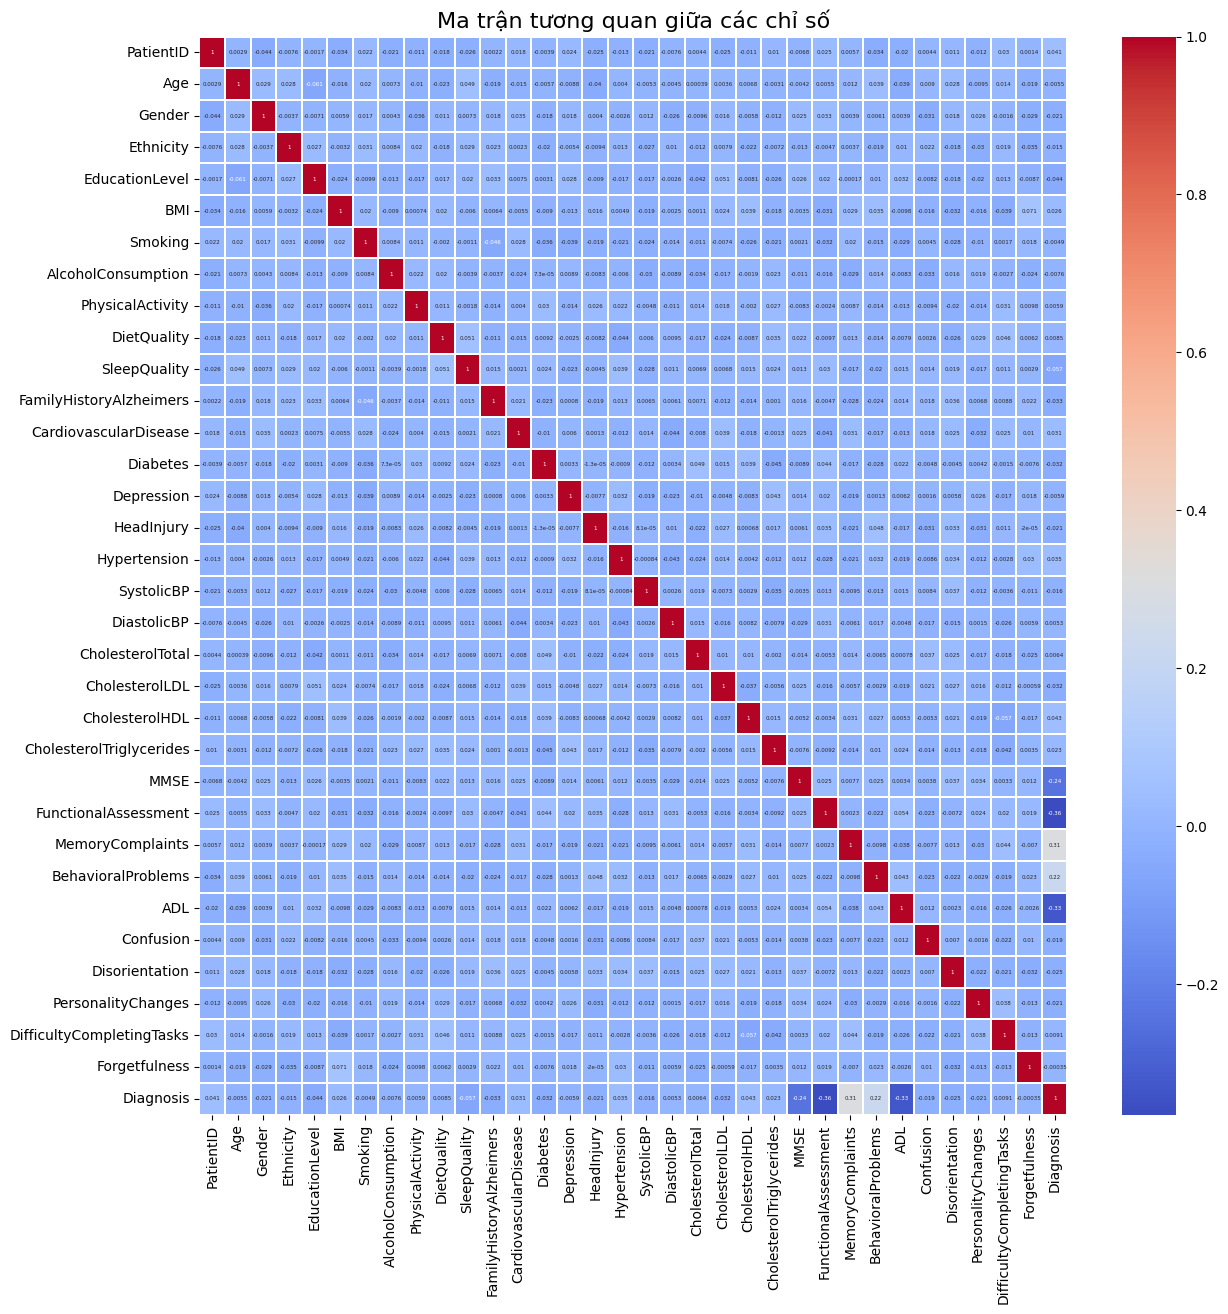

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.1, annot_kws={"size": 4})  
plt.title("Ma trận tương quan giữa các chỉ số", fontsize=16)  

Từ ma trận tương quan trên ta thấy được mức độ tương quan giữa các thuộc tính là rất yếu!!!

## Sử dụng apriori để tìm những luật kết hợp


In [13]:
categorical_cols = ['Gender', 
       'Smoking', 
       'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
       'MemoryComplaints', 'BehavioralProblems', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']


Dựa vào các cột dữ liệu phân loại, đi khám phá những đặc trưng của người mắc bệnh.

In [14]:
def genarate_rules(df, cols, target_col="Diagnosis", min_sup=0.05, min_conf=0.5):
    rules = []
    total = len(df)
    p_y = df[target_col].sum() / total

    for r in range(1, len(cols)+1):
        for th in combinations(cols, r):
            c_th = df[list(th)].all(axis=1)
            sup_x = c_th.sum() / total
            sup_xy = (c_th & (df[target_col] == 1)).sum() / total

            if sup_x == 0:
                continue
            conf = sup_xy / sup_x
            lift = conf / p_y

            if sup_xy >= min_sup and conf >= min_conf:
                rules.append({
                    "rule": th,
                    "sup": round(sup_xy, 3),
                    "conf": round(conf, 3),
                    "lift": round(lift, 3)
                })
    return pd.DataFrame(rules).sort_values(by="lift", ascending=False)
    

In [15]:
df_subset = df[categorical_cols + ["Diagnosis"]]

rules_df = genarate_rules(df_subset, categorical_cols)


In [16]:
rules_df

,rule,sup,conf,lift
0,"(MemoryComplaints,)",0.133,0.640,1.809
2,"(Gender, MemoryComplaints)",0.066,0.618,1.749
1,"(BehavioralProblems,)",0.094,0.602,1.703


## Chia dữ liệu để chạy mô hình dự đoán 

In [17]:
x = df.drop(columns=["PatientID", "Diagnosis"])
y = df["Diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
x_test

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1159,88,1,1,0,26.341457,0,17.793866,1.016087,5.708032,9.325018,...,14.488641,7.307851,0,0,6.800703,1,0,0,0,1
1822,76,0,1,2,30.998034,1,4.848165,0.377785,3.367394,7.872985,...,14.200631,3.170980,0,0,7.388050,0,0,0,0,1
978,73,0,0,1,19.060665,0,19.577591,9.290182,6.155534,8.472929,...,10.811239,9.013686,1,0,6.166283,0,0,0,1,1
759,77,1,0,3,36.391951,1,0.498616,7.621075,8.649806,8.639434,...,12.943559,7.826850,0,0,3.161108,1,0,0,0,0
874,71,0,1,0,39.291923,1,18.152064,0.084994,0.888331,7.799254,...,29.323470,8.746284,0,0,6.050739,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,77,1,1,1,33.888174,0,8.684451,0.495906,1.713044,8.580077,...,21.341299,6.079554,0,0,2.613975,0,1,1,0,0
1991,82,0,2,3,25.330454,0,0.904377,3.583844,9.552713,7.161885,...,20.504932,7.073866,0,0,3.467833,0,0,0,1,0
445,62,0,0,3,24.725563,0,14.815556,3.886584,5.939272,4.363278,...,6.492112,1.819516,1,0,1.971350,0,0,0,0,0
548,73,0,0,0,20.934329,1,10.782334,9.846122,7.706189,6.409516,...,11.487727,5.575551,0,0,9.745211,0,0,0,0,0


In [19]:
y_test

1159    0
1822    0
978     0
759     0
874     0
       ..
1103    0
1991    0
445     1
548     0
25      0
Name: Diagnosis, Length: 430, dtype: int64

## MODEL dự đoán

### Thêm các thư viện cần thiết


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB


best_models = {}

#### Hàm đánh giá giải thuật 

In [21]:
def evaluate_model(grid):
    best_model = grid.best_estimator_
    print(" Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(x_test)

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    print("\n Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


### Chúng em sử dụng các thuật toán sau để đánh dự đoán: ...

### Chi tiết các thuật toán

#### SVM

In [22]:
categorical_cols = ['Gender', 'Smoking', 
    'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems', 'Confusion',
    'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
    'Forgetfulness']
numerical_cols = [col for col in x.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


 Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       277
           1       0.82      0.71      0.76       153

    accuracy                           0.84       430
   macro avg       0.84      0.81      0.82       430
weighted avg       0.84      0.84      0.84       430


 Confusion Matrix:


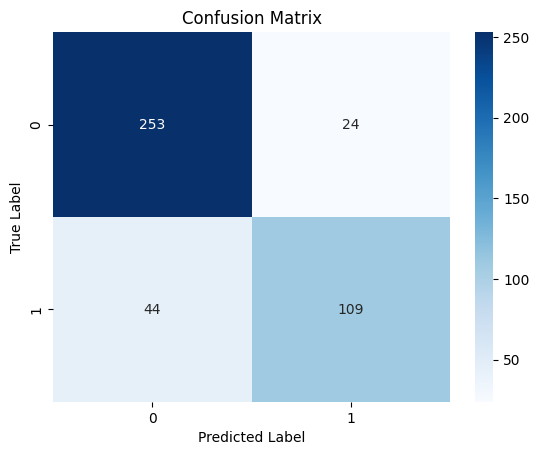

In [23]:
model_pipeline_svc = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', SVC())
])

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(model_pipeline_svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
evaluate_model(grid_search)

SVM không phù hợp có thể là do có quá nhiều dữ liệu phân loại, khi one hot làm tăng số chiều và rời rạc dữ liệu .Cũng có thể do dữ liệu phi tuyến. SVM dựa trên khoảng cách, việc onehot có thể làm các dữ liệu mất đi ý nghĩa về khoảng cách. Hiểu đơn giản là khi tăng số chiều thì làm tăng khoảng cách, làm ảnh hưởng đến các đặc trưng khác.

#### Naive Bayes

 Best Parameters: {'classifier__var_smoothing': 1e-09}

 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       277
           1       0.66      0.61      0.63       153

    accuracy                           0.75       430
   macro avg       0.73      0.72      0.72       430
weighted avg       0.75      0.75      0.75       430


 Confusion Matrix:


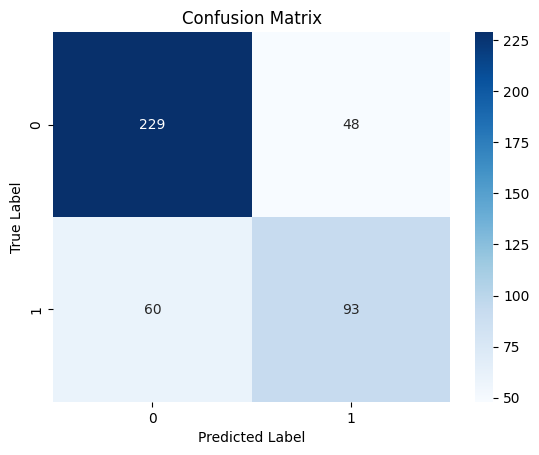

In [24]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', GaussianNB())
])

param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

evaluate_model(grid_search)

#### DecisionTree 

 Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430


 Confusion Matrix:


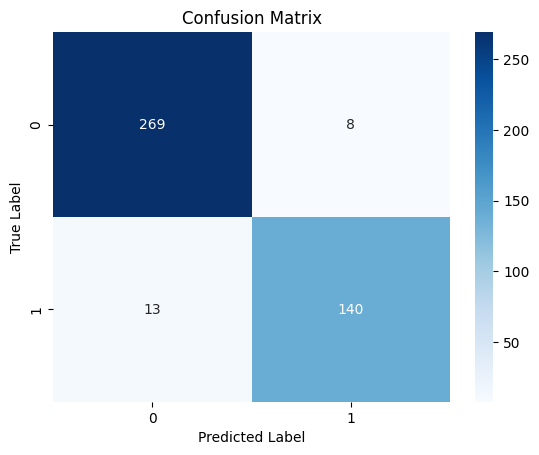

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}


dt_grid = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
best_models['DecisionTree'] = dt_grid

dt_grid.fit(x_train, y_train)

best_model = dt_grid.best_estimator_

evaluate_model(dt_grid)

#### RandomForest

 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.97      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.96      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430


 Confusion Matrix:


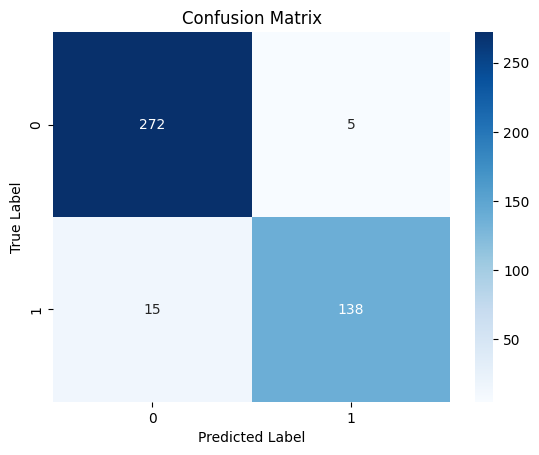

In [26]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],                      
    'criterion': ['entropy'],      
    'max_depth': [None, 10, 20, 30],                     
    'min_samples_split': [2, 5, 10],                    
    'min_samples_leaf': [1, 2, 4],          
    'bootstrap': [True, False],                          
    'class_weight': [None, 'balanced']              
}

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
best_models['RandomForest'] = grid_rf

grid_rf.fit(x_train, y_train)

evaluate_model(grid_rf)

#### XGBoost

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:46:58] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:46:58] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:1, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


 Best Parameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6}

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.97      0.91      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430


 Confusion Matrix:


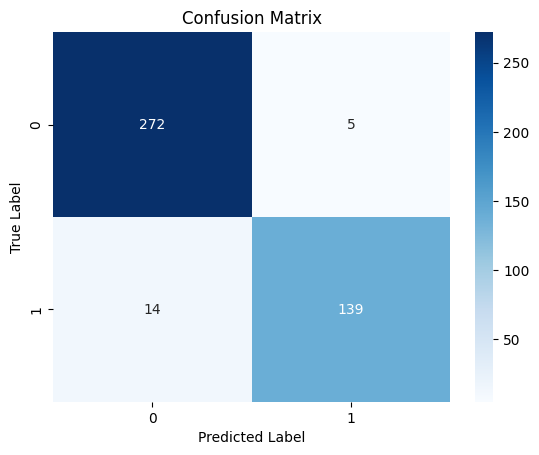

In [27]:
xgb_model = XGBClassifier(
    tree_method='hist',  
    gpu_id=1, 
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0.01, 0.1, 1],
    'reg_alpha': [0, 0.1, 0.5]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=100,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
best_models['XGBoost'] = random_search_xgb

random_search_xgb.fit(x_train, y_train)

evaluate_model(random_search_xgb)

#### LightGBM

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 18 dense feature groups (0.03 MB) transferred to GPU in 0.000834 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

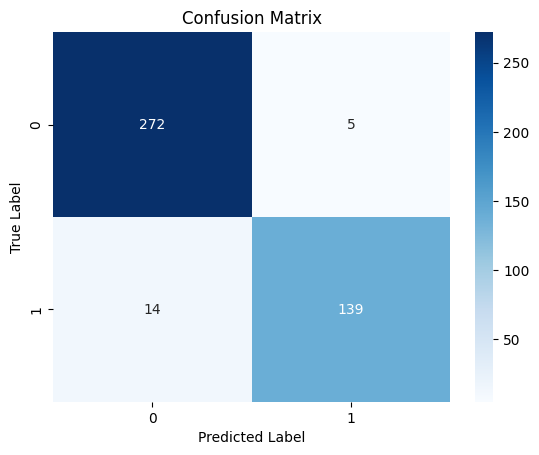

In [28]:
lgbm_model = LGBMClassifier(
    device='gpu',     
    boosting_type='gbdt',
    random_state=42
)

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.01, 0.1, 1],
    'reg_alpha': [0, 0.1, 0.5]
}

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid_lgbm,
    n_iter=100,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
best_models['LightGBM'] = random_search_lgbm


random_search_lgbm.fit(x_train, y_train)

evaluate_model(random_search_lgbm)

#### CatBoost

Fitting 3 folds for each of 100 candidates, totalling 300 fits
 Best Parameters: {'random_strength': 1, 'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 300, 'depth': 10, 'border_count': 128, 'bagging_temperature': 0}

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430


 Confusion Matrix:


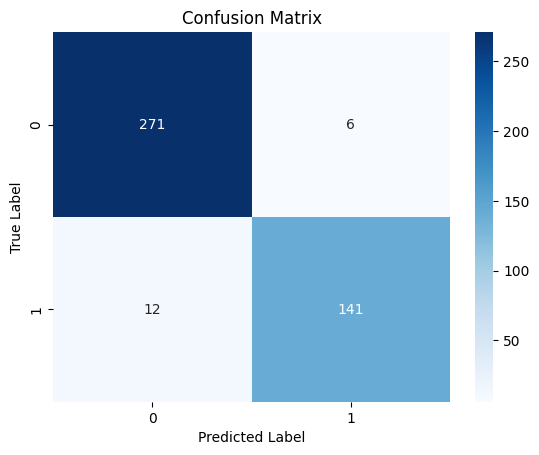

In [29]:
catboost_model = CatBoostClassifier(
    task_type='GPU',          
    devices='0',              
    verbose=0,                
    random_state=42
)

# Grid tham số phù hợp với CatBoost
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 1, 2, 5],
    'border_count': [32, 64, 128],  
    'random_strength': [1, 5, 10]
}

random_search_catboost = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid_catboost,
    n_iter=100,            
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=1
)
best_models['CatBoost'] = random_search_catboost

random_search_catboost.fit(x_train, y_train)

evaluate_model(random_search_catboost)

In [30]:
# # Tạo các pipeline cho các thuật toán
# models = {
#     "LogisticRegression": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', LogisticRegression(max_iter=1000))
#     ]),
#     "KNN": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', KNeighborsClassifier())
#     ]),
#     "SVM": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', SVC())
#     ]),
#     "DecisionTree": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', DecisionTreeClassifier())
#     ]),
#     "RandomForest": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', RandomForestClassifier())
#     ]),
#     "NaiveBayes": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', GaussianNB())
#     ]),
#     "XGBoost": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
#     ]),
#     "LightGBM": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', LGBMClassifier())
#     ]),
#     "CatBoost": Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', CatBoostClassifier(verbose=0))
#     ]),
# }

# # Grid Search cho các thuật toán có thể tinh chỉnh
# param_grids = {
#     "LogisticRegression": {
#         'classifier__C': [0.1, 1.0, 10],
#         'classifier__solver': ['lbfgs', 'liblinear']
#     },
#     "KNN": {
#         'classifier__n_neighbors': [3, 5, 7]
#     },
#     "SVM": {
#         'classifier__C': [0.1, 1, 10],
#         'classifier__kernel': ['linear', 'rbf']
#     },
#     "DecisionTree": {
#         'classifier__criterion': ['entropy'],
#         'classifier__max_depth': [None, 10, 20],
#         'classifier__min_samples_split': [2, 5]
#     },
#     "RandomForest": {
#         'classifier__n_estimators': [50, 100],
#         'classifier__max_depth': [None, 10]
#     },
#     "XGBoost": {
#         'classifier__n_estimators': [50, 100],
#         'classifier__learning_rate': [0.05, 0.1]
#     },
#     "LightGBM": {
#         'classifier__n_estimators': [50, 100],
#         'classifier__learning_rate': [0.05, 0.1]
#     },
#     "CatBoost": {
#         'classifier__iterations': [100, 200],
#         'classifier__learning_rate': [0.05, 0.1]
#     }
# }

# # Huấn luyện từng mô hình
# for model_name, model in models.items():
#     print(f"\nTraining {model_name}...")

#     if model_name in param_grids:
#         grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
#         grid.fit(x_train, y_train)
#         best_models[model_name] = grid.best_estimator_
#         print(f"Best {model_name} Parameters: {grid.best_params_}")
#     else:
#         model.fit(x_train, y_train)
#         best_models[model_name] = model

#     # Dự đoán và đánh giá
#     y_pred = best_models[model_name].predict(x_test)
#     print(f"\n{model_name} Classification Report:")
#     print(classification_report(y_test, y_pred))

## Đánh giá 

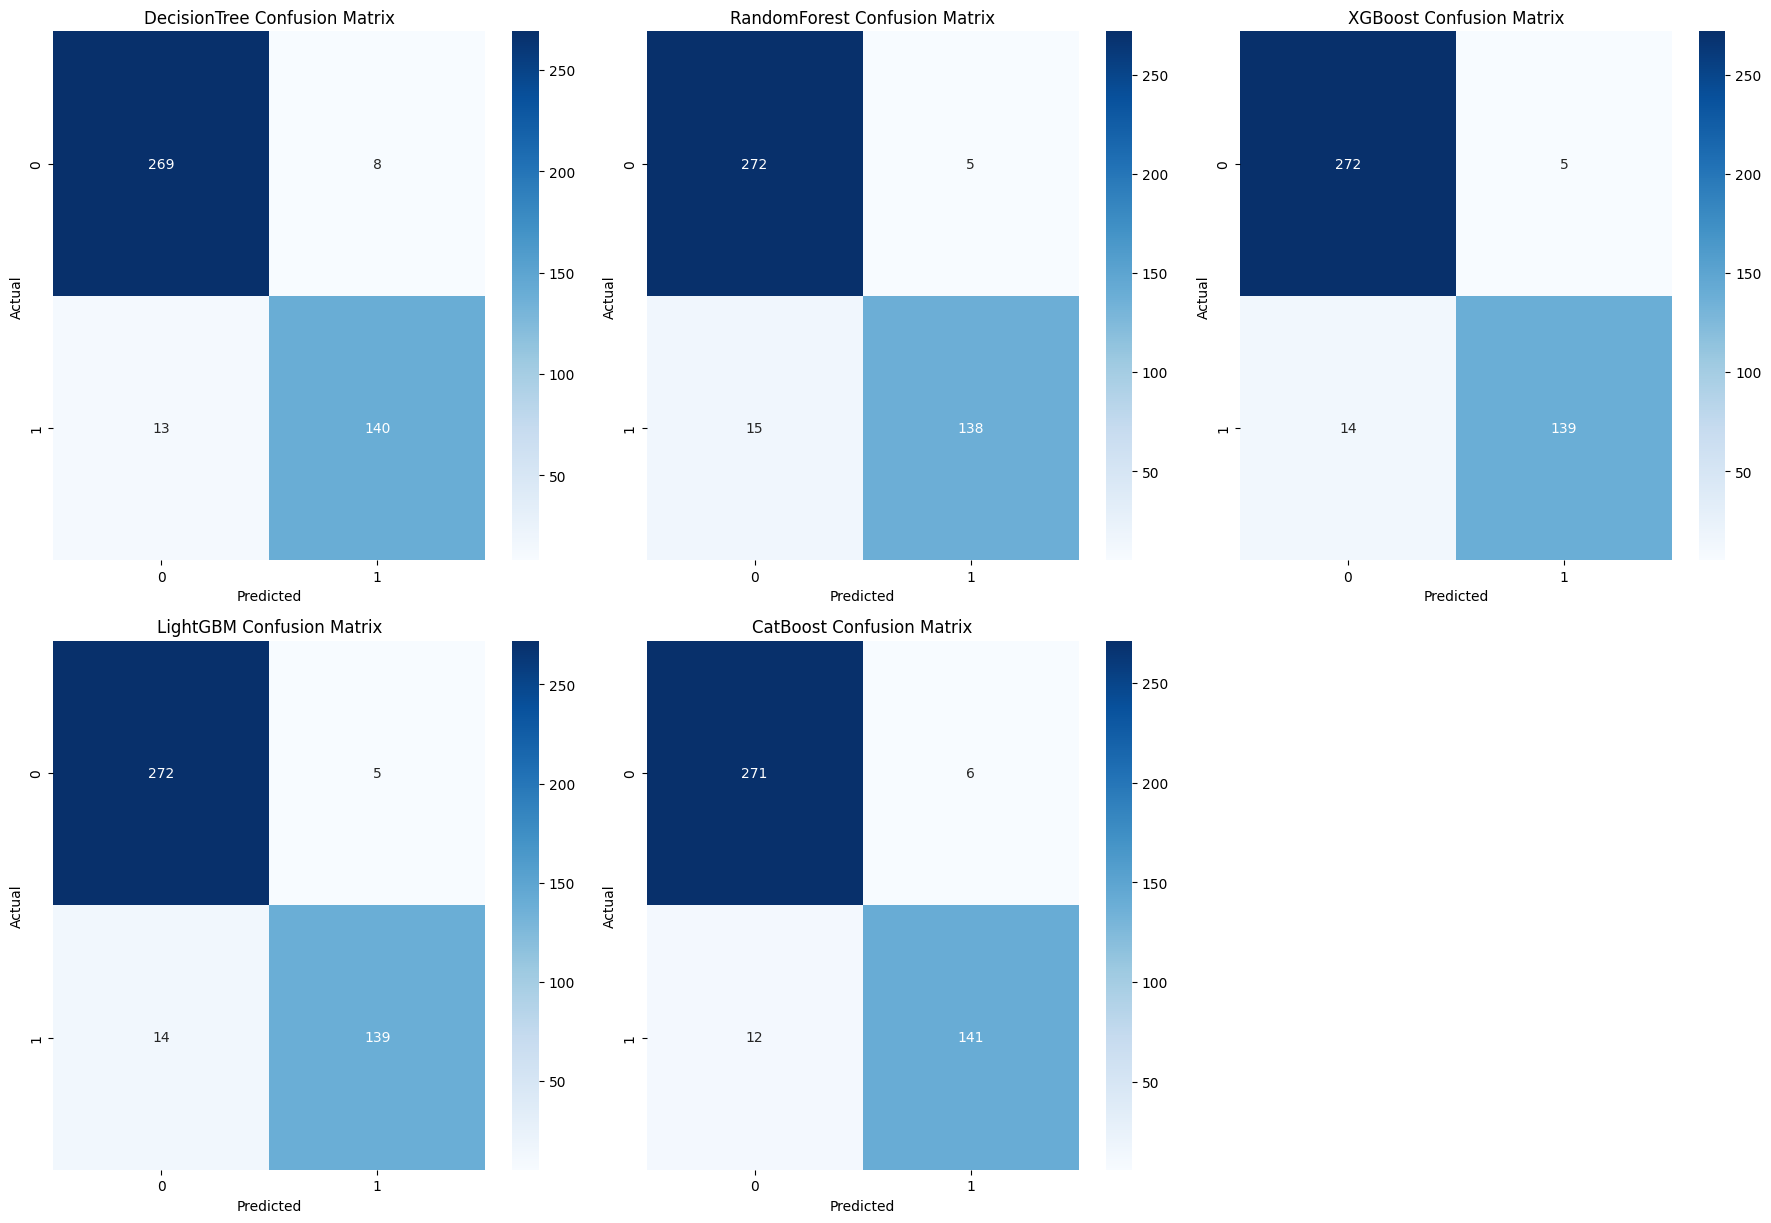

In [31]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(3, 3, figsize=(18, 18)) 
axes = axes.flatten()  
model_names = list(best_models.keys())

for i, model_name in enumerate(model_names):
    y_pred = best_models[model_name].predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{model_name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

for j in range(len(model_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


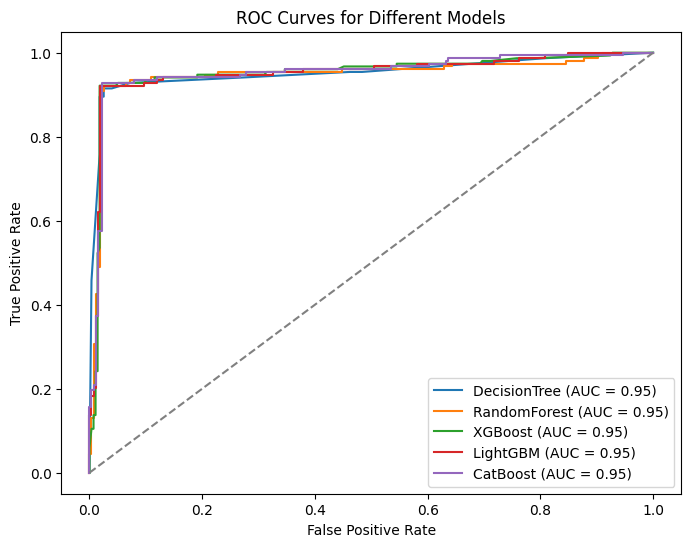

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for model_name in model_names:
    model = best_models[model_name]

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    else:
        print(f"Bỏ qua {model_name} vì không hỗ trợ predict_proba.")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()
